 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sbn
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv,index_col= "Date",infer_datetime_format=True,parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace =True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv,index_col= "Date",infer_datetime_format=True,parse_dates=True)
algo_df.sort_index(inplace=True)

algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [8]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
sp60_df = pd.read_csv(Path("Resources/sp_tsx_history.csv"),
                     index_col='Date',
                      infer_datetime_format=True,
                      parse_dates=True)

sp60_df.sort_index(inplace = True)
sp60_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sp60_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types

sp60_df['Close'] = sp60_df['Close'].str.replace('[$,]', '').astype(float)

sp60_df.dtypes


/var/folders/96/hp_6973s0s56xfbyp4yr8tcc0000gn/T/ipykernel_4171/727465102.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sp60_df['Close'] = sp60_df['Close'].str.replace('[$,]', '').astype(float)


Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp60_df_returns = sp60_df.pct_change()
sp60_df_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Drop nulls
sp60_df_returns.dropna(inplace=True)
sp60_df_returns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp60_df_returns.columns = ['S&P 60']
sp60_df_returns.head()

,S&P 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily_returns = pd.concat([whale_df,algo_df,sp60_df_returns],axis="columns",join="inner")
combined_daily_returns.sort_index(inplace=True)
combined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns- Portfolios/S&P60'}, xlabel='Date'>

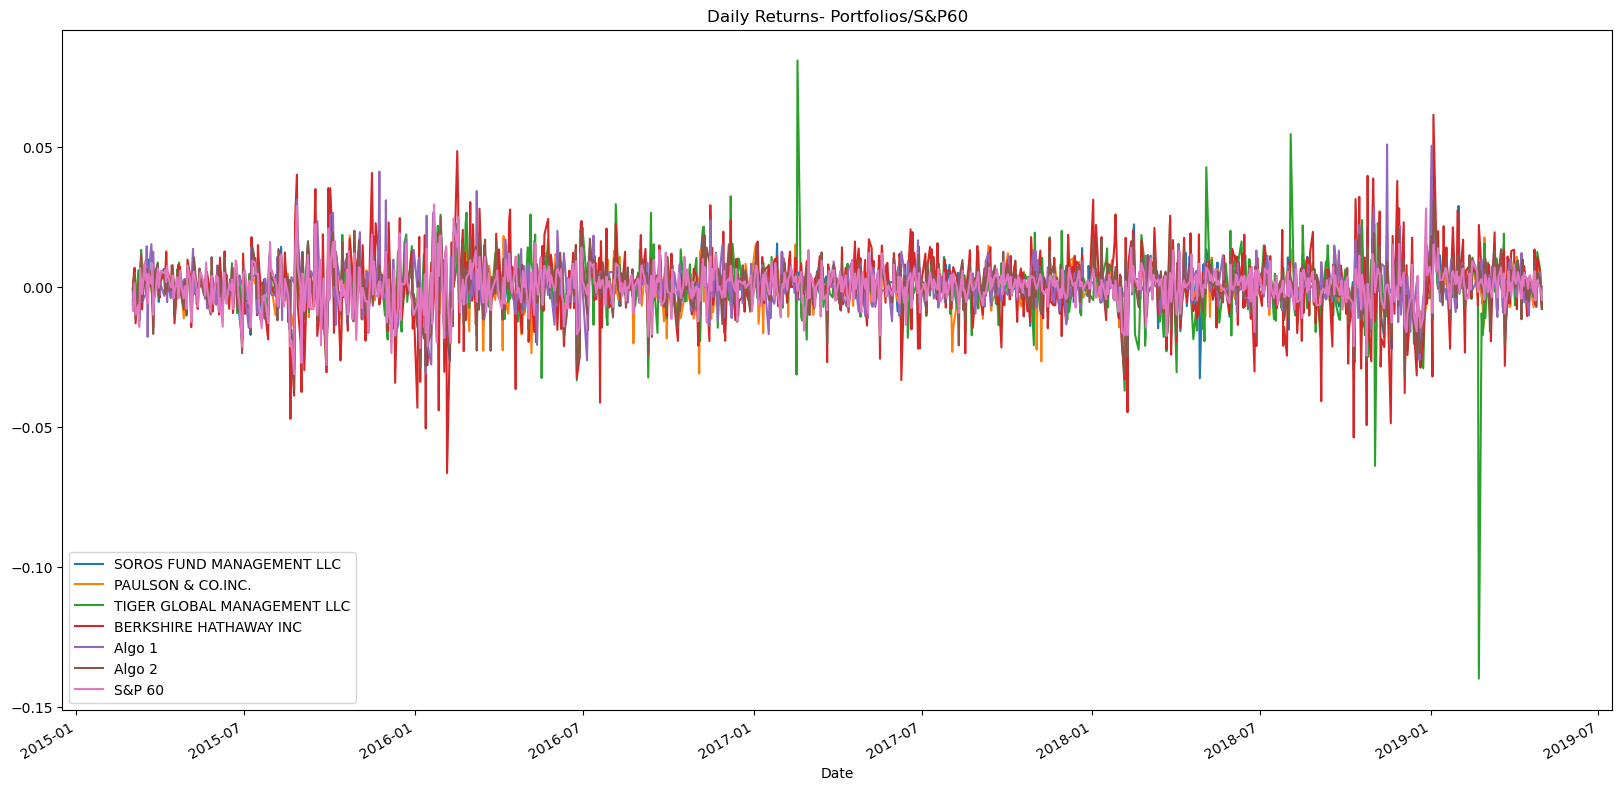

In [16]:
# Plot daily returns of all portfolios
combined_daily_returns.plot(figsize=(20,10), title="Daily Returns- Portfolios/S&P60")


#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cummulative Returns Portfolios/S&P60'}, xlabel='Date'>

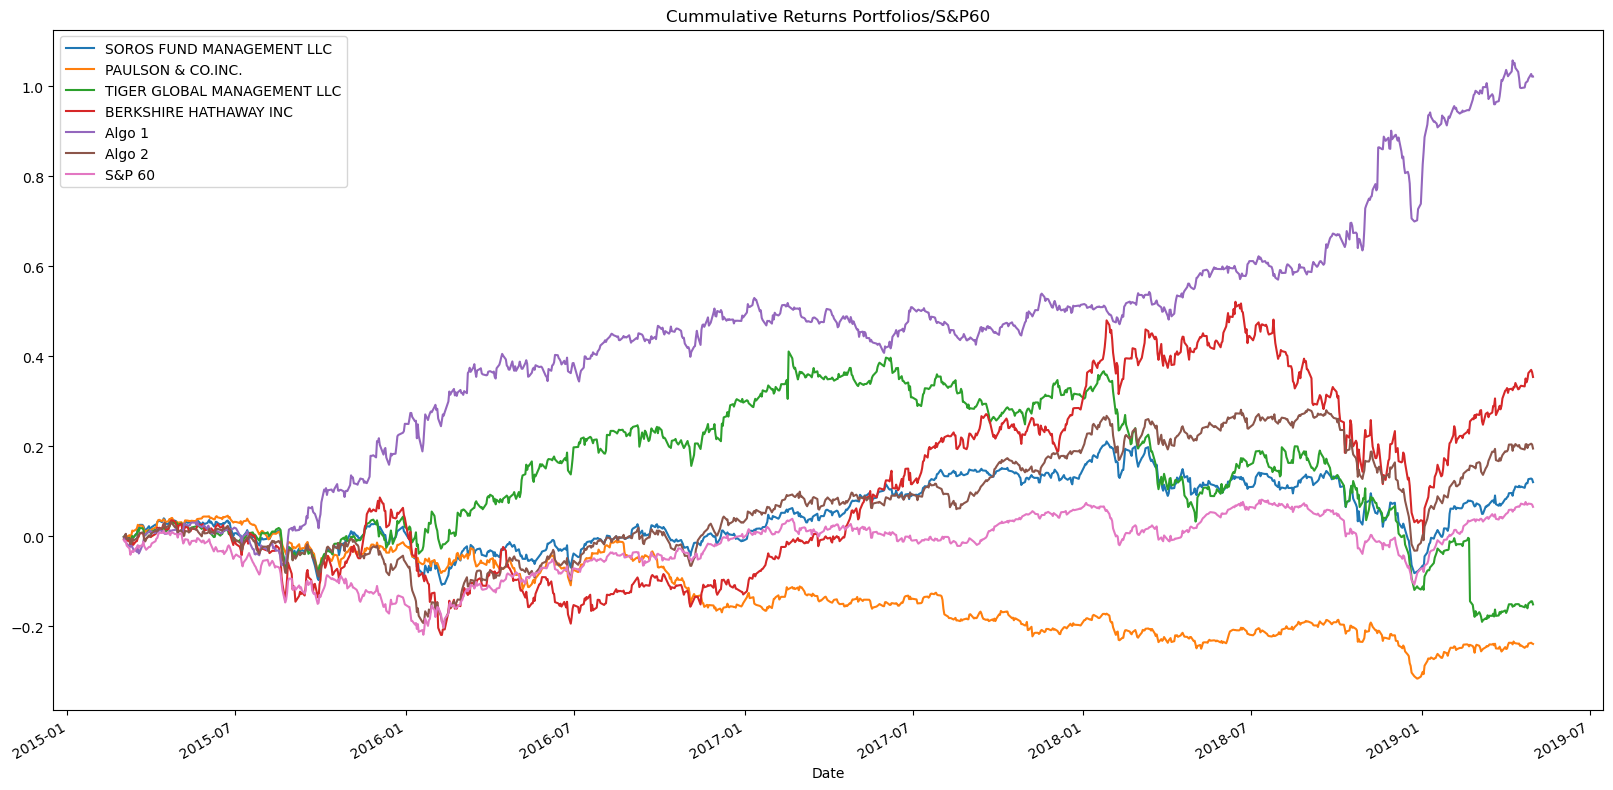

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_daily_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cummulative Returns Portfolios/S&P60")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: title={'center': 'Cummulative Return-Portfolios'}>

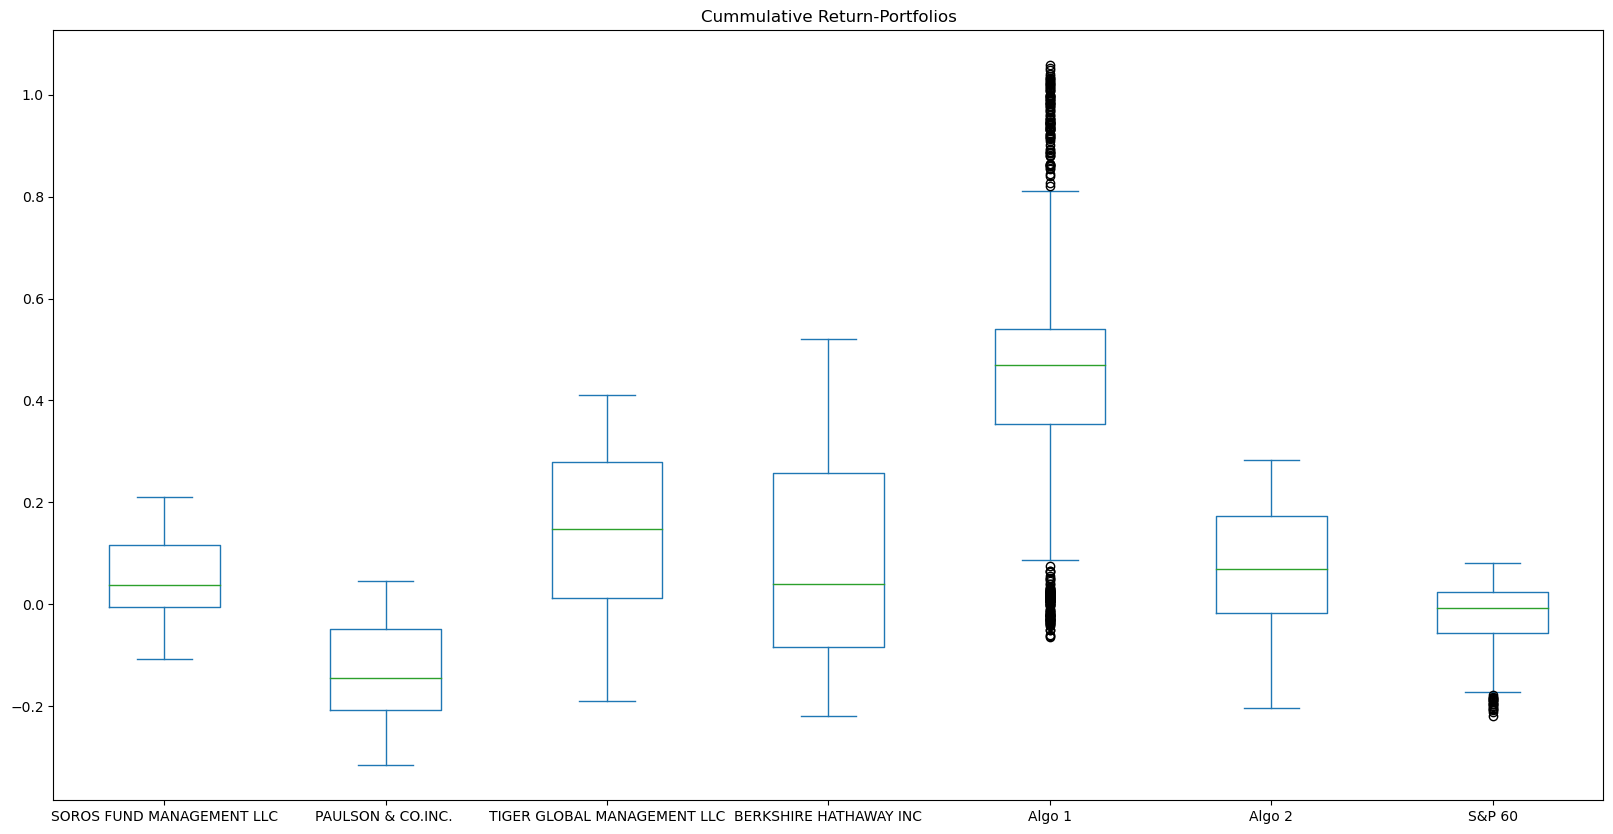

In [18]:
# Box plot to visually show risk
cumulative_returns.plot.box(title= "Cummulative Return-Portfolios", figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = combined_daily_returns.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P 60                         0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
# Determine which portfolios are riskier than the S&P TSX 60
all_portfolio_std = all_portfolio_std.sort_values(ascending=False)
all_portfolio_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P 60                         0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_portfolio_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P 60                         0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

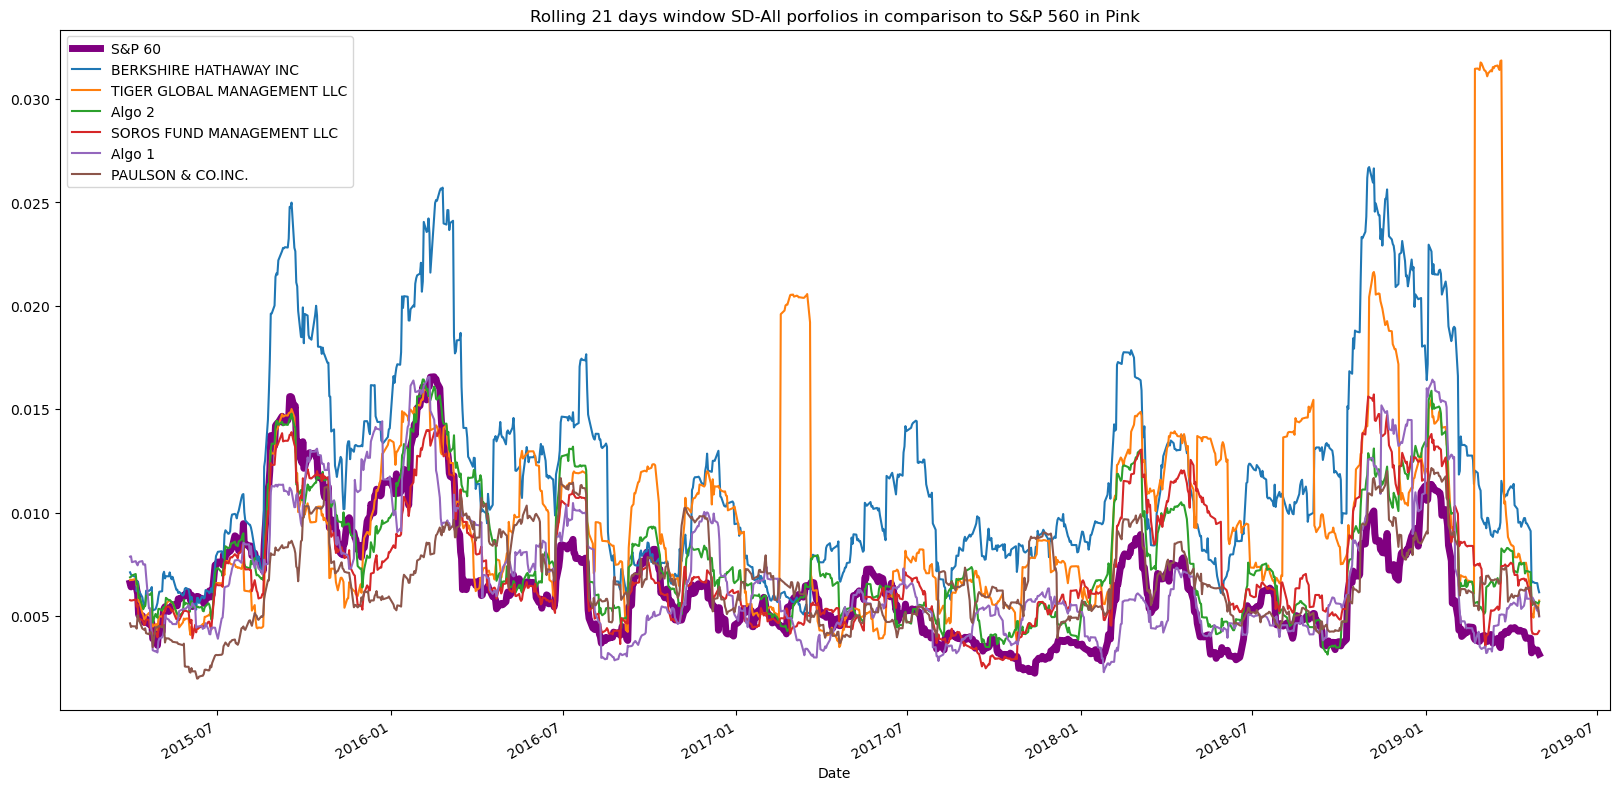

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
ax = combined_daily_returns['S&P 60'].rolling(window=21).std().plot(figsize=(20,10),lw=5, color="Purple")

# Plot the rolling standard deviation
axis = combined_daily_returns.rolling(window=21).std().plot(figsize=(20,10), 
                                                          y= ['BERKSHIRE HATHAWAY INC','TIGER GLOBAL MANAGEMENT LLC',
                                                              'Algo 2',
                                                              'SOROS FUND MANAGEMENT LLC',
                                                              'Algo 1',
                                                              'PAULSON & CO.INC. '],
                                                          title="Rolling 21 days window SD-All porfolios in comparison to S&P 560 in Pink", ax=ax)
axis.legend()

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
returns_correlations = combined_daily_returns.corr()

# Display de correlation matrix
returns_correlations

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [29]:
import matplotlib.pyplot as plt

# Calculate covariance of a single portfolio
covariance = combined_daily_returns['SOROS FUND MANAGEMENT LLC'].cov(combined_daily_returns['S&P 60'])

# Calculate variance of S&P TSX
variance_sp_tsx = combined_daily_returns['S&P 60'].var()

# Computing beta
beta_series = covariance / variance_sp_tsx

# Plot beta trend
combined_daily_returns['Date'] = combined_daily_returns.index
beta_series_plot = beta_series.plot(title="Beta Series", figsize=(20, 10))

0.7499446668435334

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [30]:
# Use `ewm` to calculate the rolling window
half_life = 21
combined_daily_returns['EWMA'] = combined_daily_returns['SOROS FUND MANAGEMENT LLC'].ewm(halflife=half_life, min_periods=half_life).std()


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualzied Sharpe Ratios
sharpe_ratio = (combined_daily_returns.mean() * 252) / (annualized_std)
sharpe_ratio.sort_values(ascending = False)

/var/folders/96/hp_6973s0s56xfbyp4yr8tcc0000gn/T/ipykernel_4171/815385458.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  sharpe_ratio = (combined_daily_returns.mean() * 252) / (annualized_std)


Algo 1                         1.491514
BERKSHIRE HATHAWAY INC         0.467045
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
S&P 60                         0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
PAULSON & CO.INC.             -0.547594
EWMA                                NaN
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

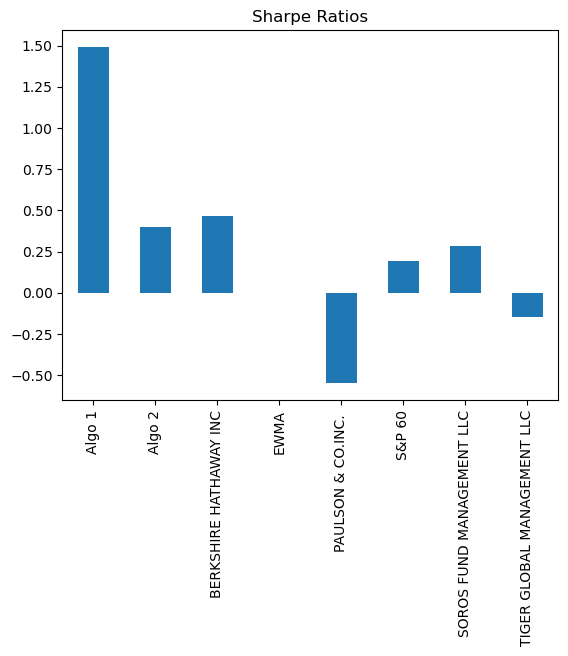

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Yes.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Reading data from 1st stock
L_stock_data = pd.read_csv('Resources/l_historical.csv', 
                             index_col='Date', 
                             infer_datetime_format=True,
                             parse_dates=True) 

L_stock_data.sort_index(inplace = True)
L_stock_data = L_stock_data.rename(columns = {"Close":"L"})
L_stock_data = L_stock_data.drop(columns=['Symbol'])


L_stock_data.head()


,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [34]:
# Reading data from 2nd stock
otex_stock_data = pd.read_csv('Resources/otex_historical.csv', 
                             index_col='Date', 
                             infer_datetime_format=True,
                             parse_dates=True) 

otex_stock_data = otex_stock_data.rename(columns = {"Close":"Otex"})
otex_stock_data = otex_stock_data.drop(columns=['Symbol'])
otex_stock_data.head()

,Otex
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [35]:
# Reading data from 3rd stock
shop_stock_data = pd.read_csv('Resources/shop_historical.csv', 
                             index_col='Date', 
                             infer_datetime_format=True,
                             parse_dates=True) 

shop_stock_data.sort_index(inplace = True)
shop_stock_data = shop_stock_data.rename(columns = {"Close":"Shop"})
shop_stock_data = shop_stock_data.drop(columns=['Symbol'])
shop_stock_data.head()

,Shop
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [36]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([L_stock_data,otex_stock_data,shop_stock_data],
                         axis="columns",
                         join="inner")
my_portfolio

,L,Otex,Shop
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [37]:
# Reset Date index
my_portfolio.sort_index(inplace=True) 
my_portfolio

,L,Otex,Shop
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [38]:
# Reorganize portfolio data by having a column per symbol
# Calculate daily returns
#daily_returns = my_portfolio.pct_change()

# Drop NAs
my_portfolio.dropna(inplace = True)

# Display sample data
my_portfolio

,L,Otex,Shop
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_daily_returns = my_portfolio.pct_change()

# Display sample data
my_daily_returns.head()


portfolio_returns = my_daily_returns.dot(weights)
portfolio_returns.head()

Date
2018-01-02         NaN
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
all_pf_returns = pd.concat([combined_daily_returns,portfolio_returns],
                           axis="columns", 
                           join="inner")

# renaming the my_porfolio
all_pf_returns.rename(columns ={0:"New PORTFOLIO"}, inplace=True)
all_pf_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 60,Date,EWMA,New PORTFOLIO
Date,,,,,,,,,,
2018-01-02,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.006222,2018-01-02,0.005893,NaN
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,2018-01-03,0.005840,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,2018-01-04,0.005752,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,2018-01-05,0.005689,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,2018-01-08,0.005634,-0.000997
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,2019-04-25,0.006819,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,2019-04-26,0.006819,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,2019-04-29,0.006708,0.003303


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_pf_returns.dropna(inplace=True)
all_pf_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 60                         0
Date                           0
EWMA                           0
New PORTFOLIO                  0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`
annualized_std = my_portfolio * np.sqrt(252)
annualized_std

,L,Otex,Shop
Date,,,
2018-01-02,920.562711,691.811053,2096.387509
2018-01-03,911.355497,683.715054,2145.439738
2018-01-04,911.514242,681.175133,2182.109851
2018-01-05,911.514242,675.777800,2178.934950
2018-01-08,902.624517,669.269252,2214.652592
...,...,...,...
2019-12-20,1077.879084,931.516122,8147.114927
2019-12-23,1074.386692,918.975260,8121.715715
2019-12-24,1074.227947,911.831732,8340.307688


### Calculate and plot rolling `std` with 21-day window

In [43]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
my_portfolio.rolling(window=21).std().dropna()



,L,Otex,Shop
Date,,,
2018-01-30,0.706601,0.457112,7.335721
2018-01-31,0.770036,0.338229,7.383160
2018-02-01,0.921630,1.199354,7.341516
2018-02-02,1.084521,1.357693,7.368538
2018-02-05,1.227265,1.462399,7.059901
...,...,...,...
2019-12-20,1.449143,0.853264,32.030897
2019-12-23,1.597104,0.861196,29.696679
2019-12-24,1.717774,0.836704,27.630205


### Calculate and plot the correlation

In [44]:
# Calculate and plot the correlation
my_portfolio.corr()

,L,Otex,Shop
L,1.000000,0.800600,0.894835
Otex,0.800600,1.000000,0.864634
Shop,0.894835,0.864634,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [45]:
# Calculate and plot Beta
covariance = my_portfolio['L'].cov(my_portfolio['Shop'])
variance = my_portfolio['Otex'].var()
series_beta_2 = covariance / variance
series_beta_2

32.85621898053674

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Calculate Annualized Sharpe Ratios
sharp = my_portfolio.mean()/my_portfolio.std()
sharp.head()

L        9.646170
Otex    10.848112
Shop     2.358460
dtype: float64

<Axes: title={'center': 'All Portfolio Sharpe Ratios'}>

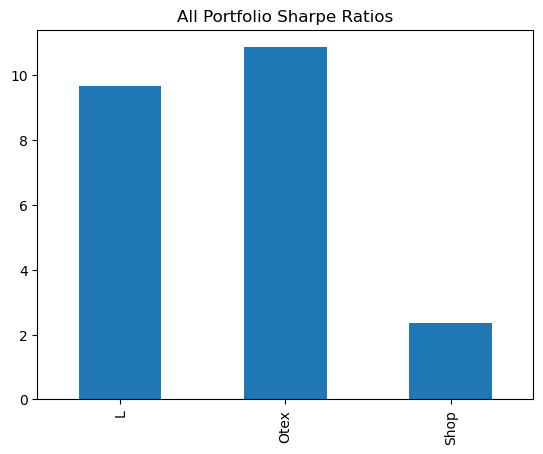

In [47]:
# Visualize the sharpe ratios as a bar plot
sharp.plot.bar(title='All Portfolio Sharpe Ratios')

### How does your portfolio do?

Asset "L" has a relatively strong positive correlation with "Otex" (correlation coefficient of 0.800600) and "Shop" (correlation coefficient of 0.894835).
Asset "Otex" also has a relatively strong positive correlation with both "L" (0.800600) and "Shop" (0.864634).
Asset "Shop" has a relatively strong positive correlation with "L" (0.894835) and "Otex" (0.864634).

The positive correlations suggest that these assets tend to move in the same direction, while negative correlations would indicate they move in opposite directions.